# Lending Club Case Study



## Objective

Identify driving factors behind loan default in order to reduce credit loss.



In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
#load the data 
inp0 = pd.read_csv('loan.csv',header=0,low_memory=False)
inp0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## 1.Data Understanding

The below steps are executed for **data understanding**:<br>
> 1. Finding number of rows & columns<br>
> 2. Determing which columns to drop based on :<br>
>> 2.1 whether the data in the columns pertains to those applications that have already been accepted<br>
>> 2.2 whether the data in the columns are unique text/descriptive values<br>
>> 2.3 whether the data in the columns are only single values<br>
>> 2.4 whether the data in the columns contain only NaN values<br>
>> 2.5 whether the data in the columns is very unique<br>
>> 2.6 whether the data contains only 1 unique value in each column<br>
>> 2.7 whether the data in the columns contain high percentage of Null & NaN values<br>
> 3. Determination & explanation of the columns that will act as driving factors to identify loans that may default<br>
> 4. Remove the rows for which applications have already been approved.    
> 5. Identification of data quality issues such as removing spaces or removing special symbols like % or in general 
    standardizing the data for EDA.

**1. Finding number of rows & columns**

In [3]:
#number of rows & columns
inp0.shape

(39717, 111)

In [4]:
#list all columns 
list(inp0.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

**2. Determing which columns to drop based on :<br>
    2.1 whether the data in the columns pertains to those applications that have already been accepted**

**Action**

Below columns contain customer behavior variables which are valid only after loan is approved and therefore they cannot be used for prediction of whether the loan will be approved. Hence these columns are removed.

List of columns and their description : To-be-completed

In [5]:
inp0.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','pub_rec_bankruptcies','revol_bal',
           'revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
           'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt',
           'last_credit_pull_d','application_type','policy_code'], 
          axis=1, inplace=True)

In [6]:
inp0.shape

(39717, 88)

**2.2 whether the data in the columns are unique text/descriptive values**

**Action**

Below columns contain data that is not pertinent in determinating the factors that will predict the possibility of the loan 
being approved because of unique text values for each row as described in the data dictionary. Hence these columns are removed.

list of columsn & their description : to - be completed

In [7]:
inp0.drop(['emp_title','pymnt_plan','url','desc','title', 'zip_code'],axis=1, inplace=True)

In [8]:
inp0.shape

(39717, 82)

**2.3 whether the data in the columns are only single values**

**Action**

Remove columns containing 0 unique values which imply that there is only 1 value in that column. This is not useful for
analysis so these columns are removed. Further analysis is executed to check whether these columns contain NaN values.

In [9]:
col0=inp0.nunique()
col0

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 82, dtype: int64

In [10]:
#column index with no values
indices0 = [i for i in range(len(col0)) if col0[i] == 0]

In [11]:
# reading the column header for the indices determined to have no unique values
inp0.columns[indices0]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

**2.4 whether the data in the columns contain only NaN values**

In [12]:
#checking if all the columns contain NaN
na_check = [inp0[i].isna().sum()  for i in inp0.columns[indices0]]
print(len(na_check))

54


In [13]:
#There are 54 rowss in na_check that contain the total number of NaNs in each column; now check whether all the rows in 
#these columns contain NaNs by comparing to total number of rows in data set which is 39717
count = sum(map(lambda x : x== 39717, na_check))
print(count)

54


**Action**

The number of NaN values in the indices list for each column is the same as the number of rows present in the dataset.
Therefore these columns only have NaN values and will be dropped as they do not add any value.

**2.5 whether the data in the columns is very unique**

In [14]:
def check_uniqueness(x):
    return [i for i in range(len(col0)) if col0[i] == x]    

In [15]:
#unique values are unique for each row; empty indices for new operation
indices0.extend(check_uniqueness(39717)) 

**Action**<br>
Columns with unique values for every row are **id** and **member_id** which can be dropped.

**2.6 whether the data contains only 1 unique value in each column**

In [16]:
# unique values are 1 for each row
indices0.extend(check_uniqueness(1))

In [17]:
#confirming the number of columns present before dropping them
inp0.shape

(39717, 82)

In [18]:
#new shape of the dataset
inp0.drop(inp0.columns[indices0],axis=1, inplace=True)
inp0.shape

(39717, 20)

**2.7 whether the data in the columns contain high percentage of Null & NaN values**

In [19]:
round((inp0.isnull().sum()/len(inp0.index))*100,1)

loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 2.7
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
addr_state                 0.0
dti                        0.0
mths_since_last_delinq    64.7
mths_since_last_record    93.0
next_pymnt_d              97.1
dtype: float64

**Action**<br>
Remove columns with null value percentage greater than 60% since these data will have no affect on prediction. Decision to replace them will be taken in Data Cleaning & Manipulation.

In [20]:
inp0.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1, inplace=True)
inp0.shape

(39717, 17)

In [21]:
round((inp0.isna().sum()/len(inp0.index))*100,1)

loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             2.7
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
addr_state             0.0
dti                    0.0
dtype: float64

**Action**<br>
NaN values present in columns **emp_length** and **pub_rec_bankruptcies**, however their percentage isn't high. Decision to replace them will be taken in Data Cleaning & Manipulation<br>
Outliers will be handled in Data Cleaning & Manipulation also.

**3. Determination & explanation of the columns that will act as driving factors to identify loans that may default**<br>
description needed<br>
1. loan_amt: <br>
2. funded_amnt<br>
3. funded_amnt_inv<br>
4. term<br>
5. int_rate<br>
6. installment<br>
7. grade<br>
8. sub-grade<br>
9. emp_length<br>
10. home_ownership<br>
11. verification_status<br>
12. annual_inc<br>
13. issue_d<br>
14. loan_status<br>
15. purpose<br>
16. addr_state<br>
17. dti<br>

**4. Remove the rows for which applications have already been approved**

In [22]:
#find all the possible values of loan status
inp0.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [23]:
#remove all loan status which are current since they have already been approved; inp0 = checkpoint of stable dataset
inp1 = inp0[~(inp0['loan_status'] == 'Current')]
inp1.shape

(38577, 17)

**5. Identification of data quality issues such as removing spaces or removing special symbols like % or in general 
standardizing the data for EDA.**

In [24]:
inp1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20


In [25]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  object 
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  object 
 14  purpose              38577 non-null  object 
 15  addr_state           38577 non-null 

In [26]:
inp1.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [27]:
inp1['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

**Data quality issues present in columns**
1. term               : remove space before numerical value
2. funded_amnt_inv    : convert to int64 since loan_amnt and funded_amnt are both integers
3. int_rate           : remove % & convert to float
4. sub_grade          : remove alphabets and convert to numerical value
5. issue_d            : convert into 2 new columns for year and month; **derived metrics**
6. ratioFINV          : new column to calculate the ratio of columns funded_amnt & funded_amnt_ivt; **derived metrics**
7. annual_inc         : check for outliers
8. emp_length         : replace the NaN values with mode of column<br>
clarity required on pub_rec_bankruptcies

## Data Cleaning & Manipulation

**1. term : remove space before numerical value**

In [28]:
inp1.term = inp1.term.apply(lambda x : x.lstrip())
inp1.term.value_counts()

36 months    29096
60 months     9481
Name: term, dtype: int64

**2. funded_amnt_inv : convert to int64 since loan_amnt and funded_amnt are both integers**

In [29]:
inp1['funded_amnt_inv'] = inp1['funded_amnt_inv'].apply(lambda x : int(x))
inp1['funded_amnt_inv'].dtypes

dtype('int64')

**3. int_rate : remove % & convert to float**

In [30]:
inp1['int_rate'] = inp1['int_rate'].apply(lambda x : float(x.rstrip('%')) ) 
inp1['int_rate'].dtypes

dtype('float64')

**4. sub_grade : remove alphabets and convert to numerical value**

In [31]:
inp1['sub_grade'] = inp1['sub_grade'].apply(lambda x : int(x[-1]) ) 
inp1['sub_grade'].dtypes

dtype('int64')

**5. issue_d : convert into 2 new columns for year and month; derived metrics**

In [32]:
inp2 = inp1.copy()
inp2.shape

(38577, 17)

In [33]:
inp2['Date'] = pd.to_datetime(inp2['issue_d'],format='%b-%y')

In [34]:
inp2['Month'] = inp2['Date'].dt.strftime('%b')

In [35]:
inp2['Year'] = pd.DatetimeIndex(inp2['Date']).year
inp2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,Date,Month,Year
0,5000,5000,4975,36 months,10.65,162.87,B,2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,2011-12-01,Dec,2011
1,2500,2500,2500,60 months,15.27,59.83,C,4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,2011-12-01,Dec,2011
2,2400,2400,2400,36 months,15.96,84.33,C,5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,2011-12-01,Dec,2011
3,10000,10000,10000,36 months,13.49,339.31,C,1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,2011-12-01,Dec,2011
5,5000,5000,5000,36 months,7.90,156.46,A,4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,2011-12-01,Dec,2011


In [36]:
#dropping below columns since it has been broken down into useful information under derived metrics
inp2.drop(['issue_d','Date'],axis=1, inplace=True)
inp2.shape

(38577, 18)

**6. ratioFINV : new column to calculate the ratio of columns funded_amnt & funded_amnt_ivt; derived metrics**

In [37]:
inp2['ratioFINV'] = inp2.apply(lambda x : round ( ( ( x['funded_amnt_inv'] * 100 ) / x['funded_amnt'] ),2 ),axis=1)
inp2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,Month,Year,ratioFINV
0,5000,5000,4975,36 months,10.65,162.87,B,2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,Dec,2011,99.5
1,2500,2500,2500,60 months,15.27,59.83,C,4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,Dec,2011,100.0
2,2400,2400,2400,36 months,15.96,84.33,C,5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,Dec,2011,100.0
3,10000,10000,10000,36 months,13.49,339.31,C,1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,Dec,2011,100.0
5,5000,5000,5000,36 months,7.90,156.46,A,4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,Dec,2011,100.0


**7. annual_inc : check for outliers**

In [38]:
inp2.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,annual_inc,dti,Year,ratioFINV
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.392332,11.932219,322.466318,3.052389,6.877797e+04,13.272727,2010.309070,94.985951
std,7348.441646,7090.306027,7022.699340,3.691327,208.639215,1.395903,6.421868e+04,6.673044,0.882658,16.172129
min,500.000000,500.000000,0.000000,5.420000,15.690000,1.000000,4.000000e+03,0.000000,2007.000000,0.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,2.000000,4.000000e+04,8.130000,2010.000000,98.610000
50%,9600.000000,9550.000000,8733.000000,11.710000,277.860000,3.000000,5.886800e+04,13.370000,2011.000000,100.000000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,4.000000,8.200000e+04,18.560000,2011.000000,100.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,5.000000,6.000000e+06,29.990000,2011.000000,100.000000


**Action**<br>
Wide variation seen in the statistics of column **annual_inc**. plot boxplot to find outliers to remove

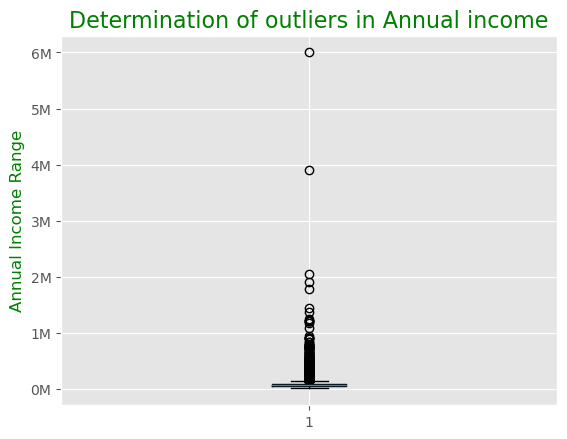

In [39]:
plt.title('Determination of outliers in Annual income',fontdict={'fontsize':16,'fontweight':5,'color':'Green'})

plt.ylabel("Annual Income Range", fontdict={'fontsize':12,'fontweight':5,'color':'Green'})

#ticks for annual income range in Million
ticks = np.arange(0,7000000,1000000)
labels = ["{}M".format(i//1000000) for i in ticks]
plt.yticks(ticks,labels)

plt.boxplot(inp2['annual_inc'])

plt.show()

In [40]:
inp2.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

**Observations**<br>
Majority of the data set on annual income is within 150,000. Clearly there are outliers after 150,000. <br>

**Action**<br>
Determine how many rows belong to the outliers and decide whether to drop them.

In [41]:
#store data in a dataset to figure out whether to drop them; also later on during EDA to check if they get high loans
inp3 = inp2[inp2['annual_inc'] >= 150000]

In [42]:
inp3['loan_status'].value_counts()

Fully Paid     1520
Charged Off     189
Name: loan_status, dtype: int64

**Observation**<br>
Majority of the applicants are Fully Paid. Based on this dataset, applicants who have higher annual income tend to 
fully pay off their loans.<br>
**Action**<br>
Remove these outliers to focus on where majority of the applicant's annual income lie within.

In [43]:
inp4 = inp2[~(inp2['annual_inc'] >= 150000)]
inp4.shape

(36868, 19)

In [44]:
inp4['annual_inc'].describe()

count     36868.000000
mean      61342.057632
std       28392.630881
min        4000.000000
25%       40000.000000
50%       56000.020000
75%       78000.000000
max      149981.000000
Name: annual_inc, dtype: float64

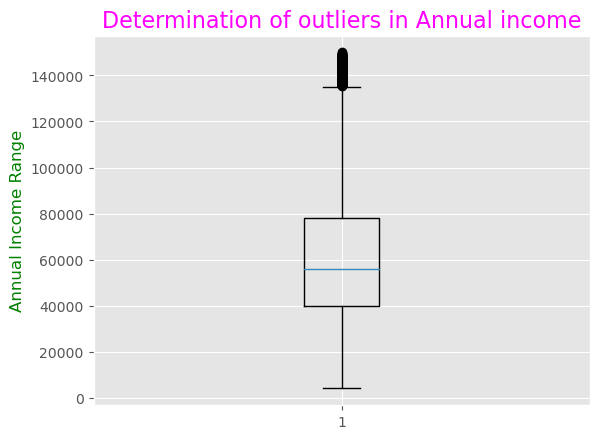

In [45]:
#plot the boxplot again
plt.title('Determination of outliers in Annual income',fontdict={'fontsize':16,'fontweight':5,'color':'Magenta'})
plt.ylabel("Annual Income Range", fontdict={'fontsize':12,'fontweight':5,'color':'Green'})
plt.boxplot(inp4['annual_inc'])
plt.show()

**8. emp_length : replace the NaN values with mode of column**

In [46]:
inp4['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [47]:
inp4['emp_length'].mode()

0    10+ years
Name: emp_length, dtype: object

In [48]:
inp4['emp_length'].fillna(inp4['emp_length'].mode()[0],inplace=True)
print("NaN present: ", inp4['emp_length'].isna().sum())
print("Null present: ", inp4['emp_length'].isnull().sum())

NaN present:  0
Null present:  0


In [49]:
inp4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36868 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            36868 non-null  int64  
 1   funded_amnt          36868 non-null  int64  
 2   funded_amnt_inv      36868 non-null  int64  
 3   term                 36868 non-null  object 
 4   int_rate             36868 non-null  float64
 5   installment          36868 non-null  float64
 6   grade                36868 non-null  object 
 7   sub_grade            36868 non-null  int64  
 8   emp_length           36868 non-null  object 
 9   home_ownership       36868 non-null  object 
 10  annual_inc           36868 non-null  float64
 11  verification_status  36868 non-null  object 
 12  loan_status          36868 non-null  object 
 13  purpose              36868 non-null  object 
 14  addr_state           36868 non-null  object 
 15  dti                  36868 non-null 

**Observation**<br>
No Null or NaN values present in any column. All data cleaning and manipulation is now complete. 

## Data Analysis

### Univariate analysis<br>

Columns to focus on:<br>
1. home_ownership : unordered categorical variables<br>
2. grade : ordered categorical variables<br>
3. term: ordered categorical variables<br>
4. funded_amnt_inv: continuous numerical variables

**1. home_ownership : how many applications fall under each category of home_ownership**<br>
**2. grade : under what grades did most of the candidate's loans fall under**<br>
**3. term : how many applicants belonged to each term**<br>
**4. funded_amnt_inv : what is the distribution of the loan amount funded by the investor**

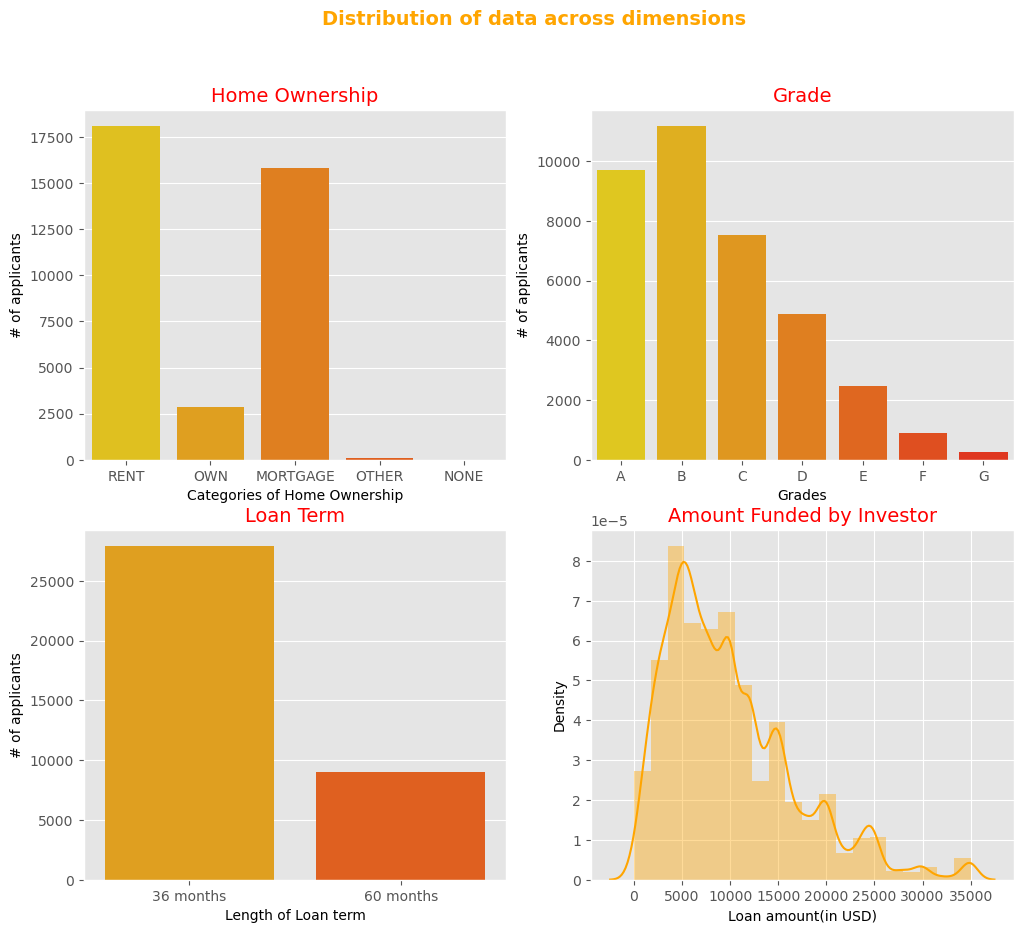

In [50]:
#subplots for the univariate analysis
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.title('Home Ownership',fontdict={'fontsize':14,'fontweight':5,'color':'Red'})
sns.countplot(data=inp4, x='home_ownership',palette='autumn_r')
plt.xlabel("Categories of Home Ownership")
plt.ylabel("# of applicants")

plt.subplot(2,2,2)
plt.title('Grade',fontdict={'fontsize':14,'fontweight':5,'color':'Red'})
sns.countplot(data=inp4, x='grade',order=['A','B','C','D','E','F','G'], palette="autumn_r")
plt.xlabel("Grades")
plt.ylabel("# of applicants")

plt.subplot(2,2,3)
plt.title('Loan Term',fontdict={'fontsize':14,'fontweight':5,'color':'Red'})
sns.countplot(data=inp4, x='term',order=['36 months','60 months'], palette="autumn_r")
plt.xlabel("Length of Loan term")
plt.ylabel("# of applicants")

plt.subplot(2,2,4)
plt.title('Amount Funded by Investor',fontdict={'fontsize':14,'fontweight':5,'color':'Red'})
sns.distplot(inp4['funded_amnt_inv'],bins=20,color='orange')
plt.xlabel("Loan amount(in USD)")

plt.suptitle('Distribution of data across dimensions',fontsize=14,color='Orange',weight='bold')
plt.show()

**Observations on:**<br>
**1. home_ownership**<br>
A large number of loan applicants were on Rent or were paying Mortgage on their houses implying that many applications in the future would come from such profiles. Candidates who own their houses do not generally apply for loans that frequently. For some candidates, the status of their residence could not be determined but since the data is neglible, they can be ignored. <br>
**2. grade**<br>
Majority of the loans belonged to the grades B and A in order. <br>
**3. term**<br>
Majority of the applicants opted for 36 months duration of the loan.<br>
**4. funded_amnt_inv**<br>
Majority of the loans funded by the investor is around 5000 implying that many applicants are seeking smaller loans.

**Observations based on columns home_ownership, grade, term and funded_amnt_inv together**<br>
A large majority of applicants are those whose funds were funded by investors for smaller loan amounts(around 5,000) and
live on Rent or have Mortgages with loan applications with grades A or B and with a term of 36 months.

## Bivariate Analysis<br>
1. segment on grades & loan status, univariate analysis on mean of loan amounts funded by investors

**1. segment on grades & loan status, univariate analysis on mean of loan amounts funded by investors**

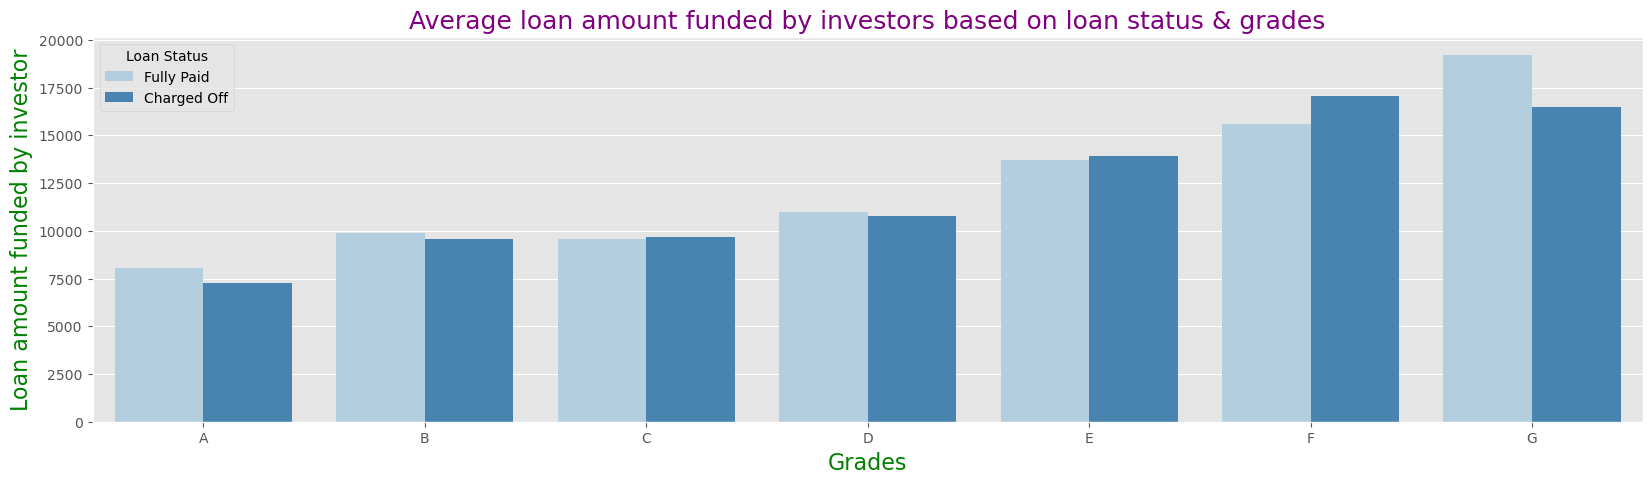

In [82]:
plt.figure(figsize=(20,5))
plt.title("Average loan amount funded by investors based on loan status & grades",fontdict={'fontsize':18,'fontweight':5,
                                                                                 'color':'Purple'})
sns.barplot(data=inp4, x='grade',order=['A','B','C','D','E','F','G'],y='funded_amnt_inv',hue='loan_status',
            palette='Blues',ci=0 )           

plt.ylabel("Loan amount funded by investor",fontdict={'fontsize':16,'fontweight':5,'color':'Green'})
plt.xlabel("Grades",fontdict={'fontsize':16,'fontweight':5,'color':'Green'})
plt.legend(title="Loan Status")

plt.show()

**Observation**<br>
On average of loan amount that is funded by investors, the maximum amount of loan has been given to those applicants whose
loans are of **grade G** where there is a visible difference between the status of loans. All other segments have negligible 
difference.

**2. segment on Year and loan status, univariate analysis on mean of loan amounts funded by investors**

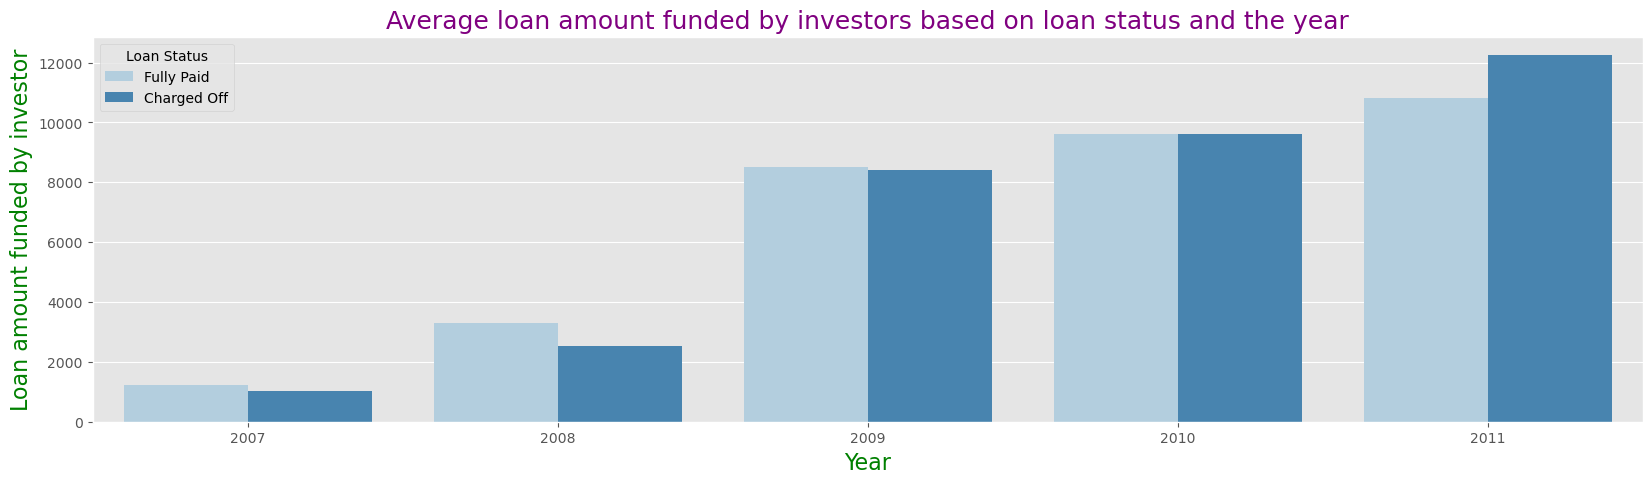

In [84]:
plt.figure(figsize=(20,5))
plt.title("Average loan amount funded by investors based on loan status and the year",
          fontdict={'fontsize':18,'fontweight':5,'color':'Purple'})

sns.barplot(data=inp4, x='Year',y='funded_amnt_inv',hue='loan_status',palette='Blues',ci=0)

plt.ylabel("Loan amount funded by investor",fontdict={'fontsize':16,'fontweight':5,'color':'Green'})
plt.xlabel("Year",fontdict={'fontsize':16,'fontweight':5,'color':'Green'})
plt.legend(title="Loan Status")

plt.show()

**Observation**<br>
Maximum loans that were defaulted was in the year 2011 and the least was in the year 2007. The exact same behavior exists
also for the those loans that were Fully paid.<br>

**Action**<br>
Continue this analysis by comparing the months in the year 2011. Also check how many applicants were present in each of these years.

In [87]:
inp4.Year.value_counts()

2011    19562
2010    11074
2009     4504
2008     1497
2007      231
Name: Year, dtype: int64

**Observation**<br>
Maximum applicants were in year 2011 followed by 2010. This gives a partial explanation on why there are many defaults
in the year 2011.

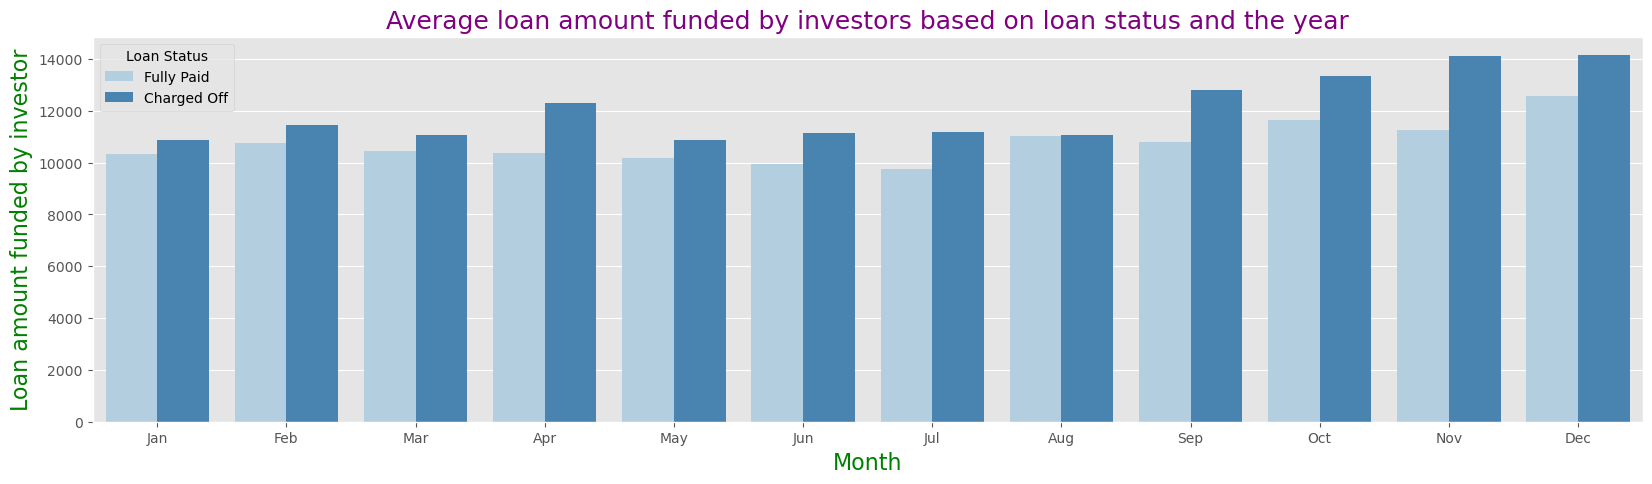

In [86]:
plt.figure(figsize=(20,5))
plt.title("Average loan amount funded by investors based on loan status and the year 2011",
          fontdict={'fontsize':18,'fontweight':5,'color':'Purple'})

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.barplot(data=(inp4[inp4['Year']==2011]), x='Month',y='funded_amnt_inv', order=months,ci=0,palette='Blues',
            hue='loan_status')

plt.ylabel("Loan amount funded by investor",fontdict={'fontsize':16,'fontweight':5,'color':'Green'})
plt.xlabel("Month",fontdict={'fontsize':16,'fontweight':5,'color':'Green'})
plt.legend(title="Loan Status")

plt.show()

**Observation**<br>
Maximum defaults occurred during later half of the year which are Sept, Oct, Nov & Dec and Apr during mid of the year. There is a consistency in loans that were fully paid off in the year 2011 which has maximum defaults. <br>

**Action**<br>
Continue this analysis with comparison with Annual income in the year 2011.

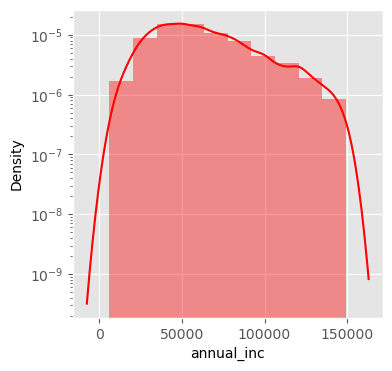

count      9069.000000
mean      62085.112537
std       28121.684635
min        6000.000000
25%       40000.000000
50%       57600.000000
75%       79992.000000
max      149400.000000
Name: annual_inc, dtype: float64


In [110]:
#new data set to store subset for Year 2011, and Month = Apr,Sep,Oct,Nov,Dec
inp5 = inp4[ (inp4.Year == 2011) & (inp4.Month.isin(['Apr','Sep','Oct','Nov','Dec']) ) ]

plt.figure(figsize=(4,4))
plt.yscale("log")
sns.distplot(inp5['annual_inc'],bins=10,color='red')
plt.show()

print(inp5['annual_inc'].describe())

In [111]:
#statistics for main dataset
inp4['annual_inc'].describe()

count     36868.000000
mean      61342.057632
std       28392.630881
min        4000.000000
25%       40000.000000
50%       56000.020000
75%       78000.000000
max      149981.000000
Name: annual_inc, dtype: float64

**Observation**<br>
Majority of the applicants had an annual income app USD 57,600 in the year 2011 which is approximately around the median 
for the main dataset. Annual income did not increase drastically to explain why there were so many loan applications.
Therefore continue analysis with purpose of the loan.

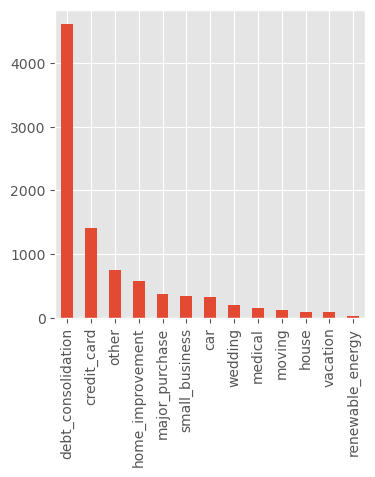

In [117]:
plt.figure(figsize=(4,4))
inp5.purpose.value_counts().plot.bar()
plt.show()

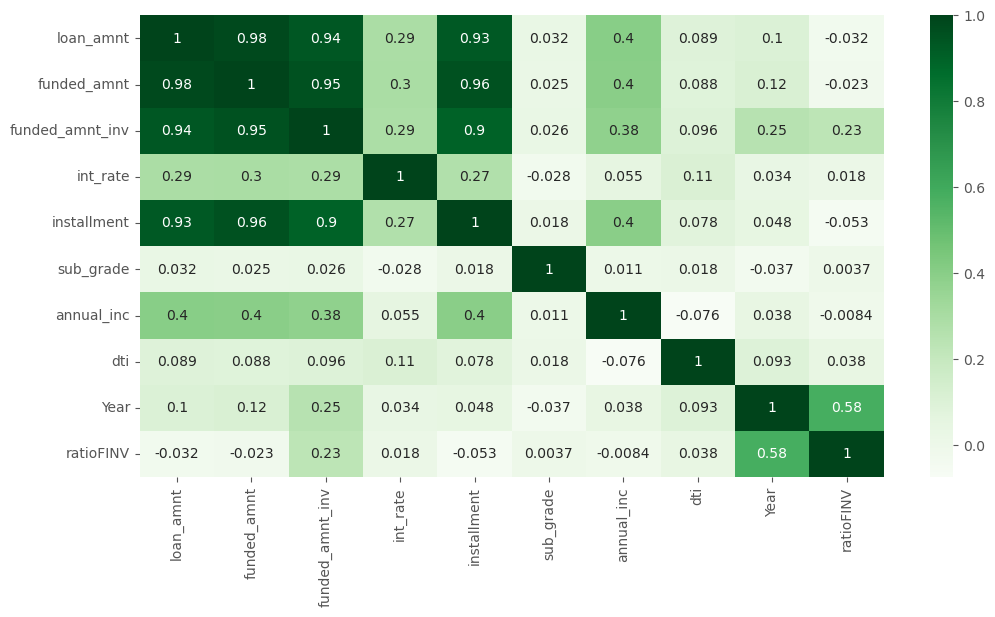

In [122]:
#build correlation heatmap; helps in further bivariate analysis
plt.figure(figsize=(12,6))
sns.heatmap(inp4.corr(), cmap="Greens",annot=True)
plt.show()

**Observation**<br>
1. High correlation between loan_amnt, funded_amnt & funded_amnt_inv.<br>
2. High correlation between interest rate and loan_amnt, funded_amnt & funded_amnt_inv. <br>
3. Good correlation between Year and ratioFINV.

**3. Relationship between loan_amnt, funded_amnt & funded_amnt_inv**

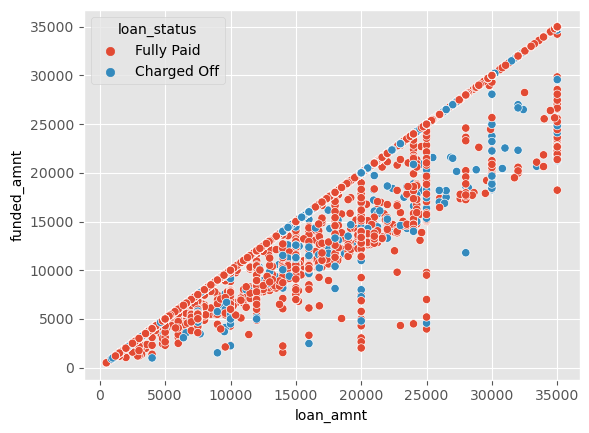

In [127]:
sns.scatterplot(x=inp4['loan_amnt'],y=inp4['funded_amnt'],hue=inp4['loan_status'])
plt.show()

In [ ]:
#violin plot reqd~!!